In [1]:
%pylab inline

import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import os
import warnings


import matplotlib.pyplot as plt
import plotly.graph_objs as go

#многопоточность
from multiprocessing import Pool , Process
from multiprocessing import Manager

Populating the interactive namespace from numpy and matplotlib


In [2]:
import xgboost as xgb
import lightgbm as lgb

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter


from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import VotingClassifier as vc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier as sgd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import Lasso as las
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

from catboost import Pool, CatBoostRegressor , CatBoostClassifier



In [3]:
train_directory = "data/train.csv"
test_directory = "data/test.csv"
train = pd.read_csv(train_directory, header=0 )
test = pd.read_csv(test_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

# data visualisation

In [7]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
train.head()
train['cons.conf.idx'].unique()

array([-46.2, -36.4, -41.8, -42. , -37.5, -42.7, -36.1, -34.8, -50. ,
       -40.8, -49.5, -38.3, -29.8, -26.9, -34.6, -47.1, -39.8, -33.6,
       -50.8, -31.4, -30.1, -40.3, -40. , -40.4, -33. , -45.9])

In [400]:
#выделим категариальные признаки  и количественные признаки

cat_feats = []
num_feats = []

for feat in train.dtypes.keys():
    if train.dtypes[feat] == 'object' and feat != 'y':
        cat_feats.append(feat)
    elif feat != 'y':
        num_feats.append(feat)
        

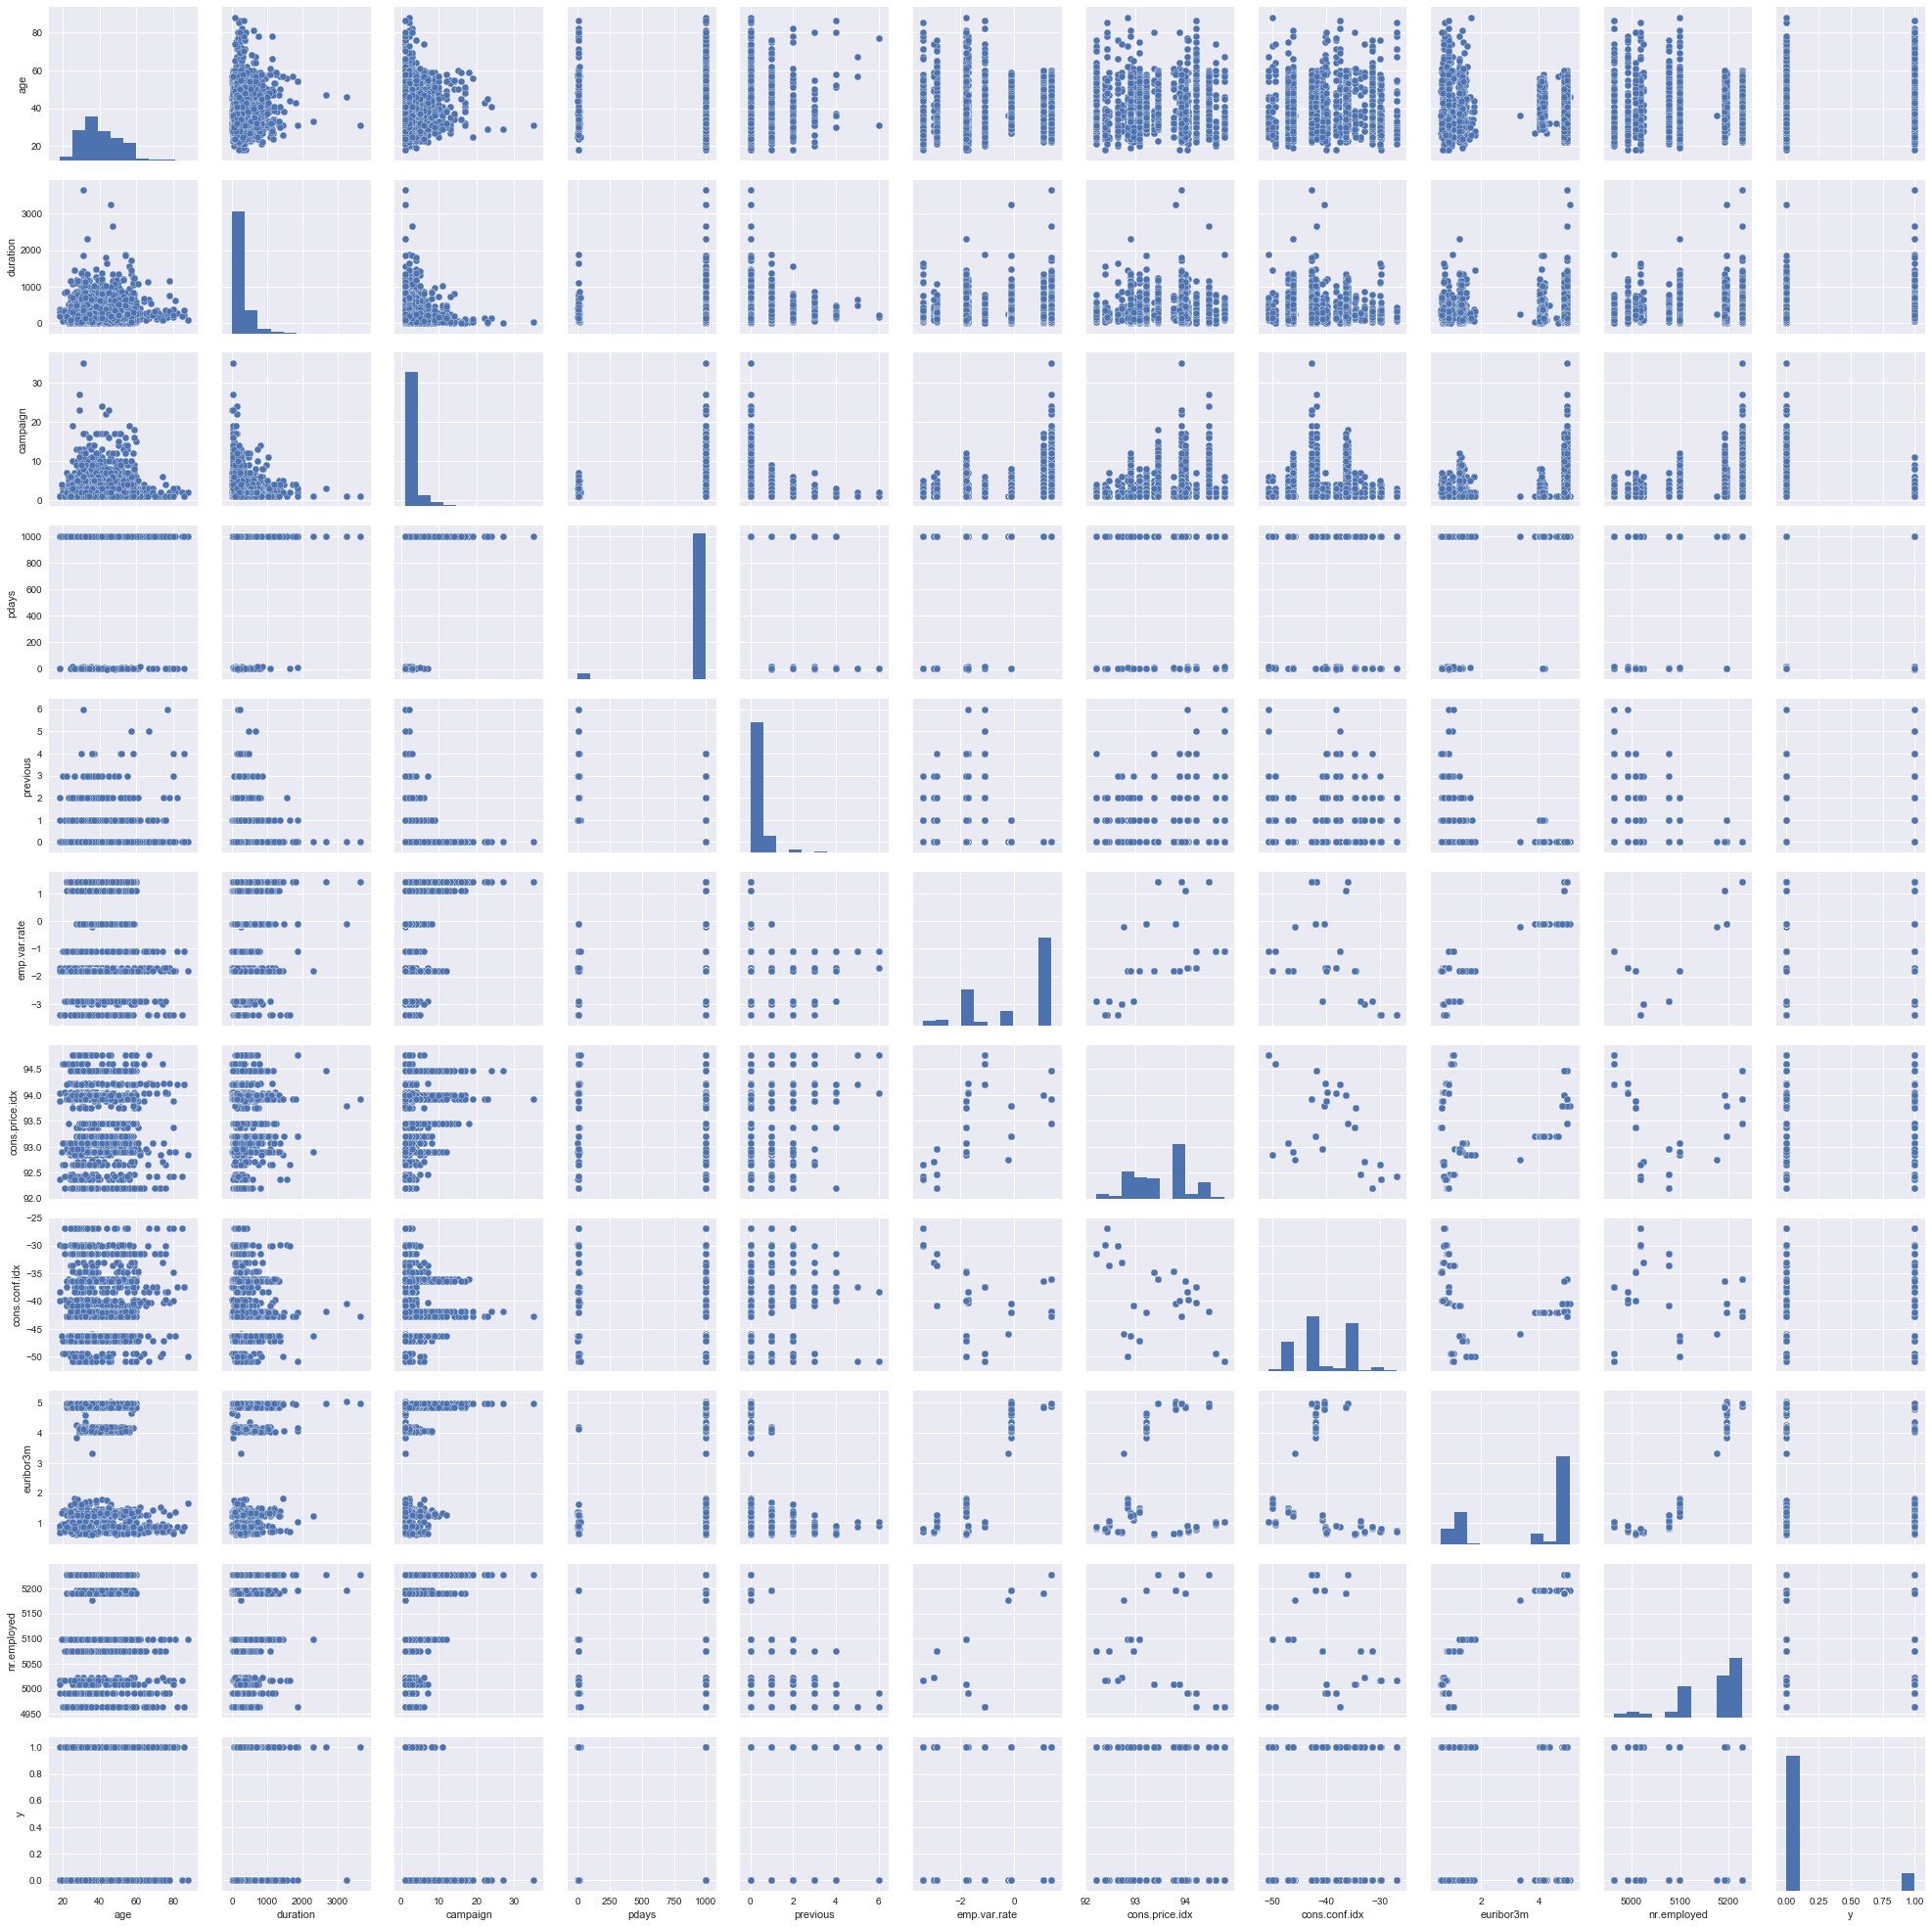

In [401]:
import seaborn as sns
sns.pairplot(train)

In [402]:
train[num_feats].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


In [403]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000,3222.00000,3222.000000,3222.000000,3222.000000,3222.000000,3222.000000
mean,39.949100,254.391682,2.525140,961.075729,0.191186,0.09162,93.587576,-40.580261,3.618885,5166.177654,0.112353
std,10.292639,253.617387,2.546888,190.390725,0.552781,1.55203,0.578841,4.575879,1.734232,74.028498,0.315849
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.10000,93.876000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### количественные факторы

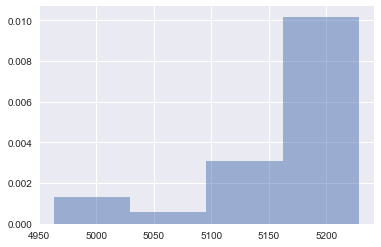

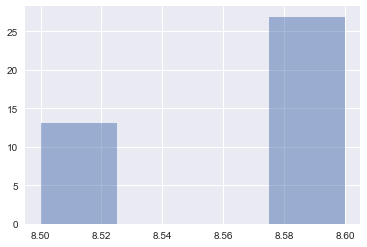

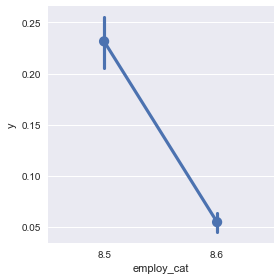

employ_cat,8.5,8.6,All
y,,,
0,810,2050,2860
1,244,118,362
All,1054,2168,3222


In [404]:
plt.hist(train['nr.employed'], normed=True, bins=4, alpha=0.5  , label='hist' )
plt.show()

plt.hist(round(np.log(train['nr.employed']+0.1),1), normed=True, bins=4, alpha=0.5  , label='hist' )
plt.show()

#в зависимости от количества сотрудников выделяется различие в вероятности использования банковскимпродуктом
train['employ_cat'] = round(np.log(train['nr.employed']+0.1),1)
sns.factorplot('employ_cat','y',data=train)
plt.show()


pd.crosstab(train.y,train.employ_cat,margins=True).style.background_gradient(cmap='summer_r')


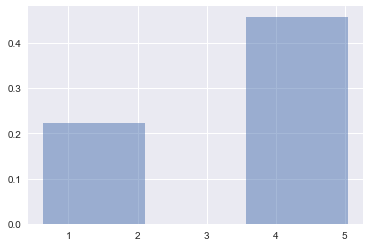

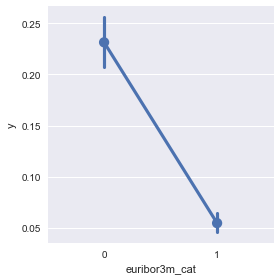

euribor3m_cat,0,1,All
y,,,
0,810,2050,2860
1,244,118,362
All,1054,2168,3222


In [405]:
plt.hist(train['euribor3m'], normed=True, bins=3, alpha=0.5  , label='hist' )
plt.show()


#можно выделить 2 группы пользователей с индексом доверия > 3 и менее, среднего поведения нет, по-этому можно разделить прямым методом
train['euribor3m_cat'] = [1 if euribor > 3 else 0 for euribor in train['euribor3m']]
sns.factorplot('euribor3m_cat','y',data=train)
plt.show()
#видно, что у группы с низким уровнем доверия вероятность воспользоваться банковским продуктом существенно выше
pd.crosstab(train.y,train.euribor3m_cat,margins=True).style.background_gradient(cmap='summer_r')


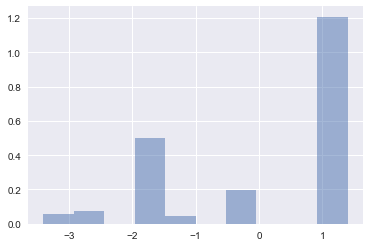

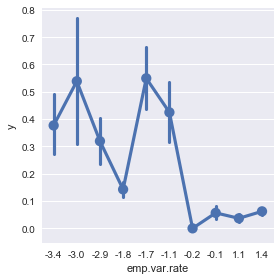

In [406]:
plt.hist(train['emp.var.rate'], normed=True, bins=10, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('emp.var.rate','y',data=train)
plt.show()
#интересно, люди, у кого ухудшился показатель занятости за квартал более чем на 1 единицу значительно озотнее берут банковский продукт
#выделим этот фактор

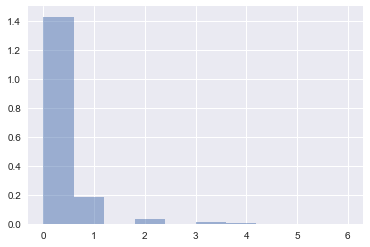

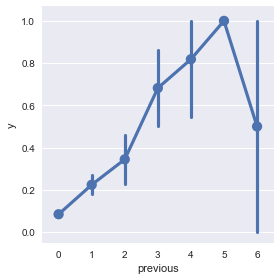

previous,0,1,2,3,4,5,6,All
y,,,,,,,,
0,2529,281,40,7,2,0,1,2860
1,233,81,21,15,9,2,1,362
All,2762,362,61,22,11,2,2,3222


In [407]:
plt.hist(train['previous'], normed=True, bins=10, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('previous','y',data=train)
plt.show()
#нет информации более 2 контактов ранее, мат ожидание результата с учетом отклонения при этом сохрагняется, объединим в один класс >2 контактов ранее
pd.crosstab(train.y,train.previous,margins=True).style.background_gradient(cmap='summer_r')
#видно, что вероятности существенно отличаются в каждом случае, можно выделить данный фактор как категориальный

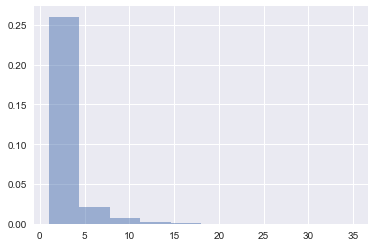

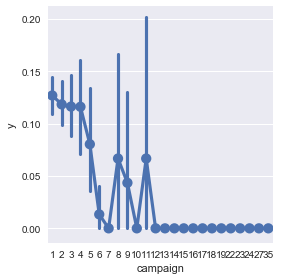

campaign,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,27,35,All
y,,,,,,,,,,,,,,,,,,,,,,,,,
0,1225,700,380,198,103,74,44,28,22,17,14,14,9,6,2,5,10,1,2,1,2,1,1,1,2860
1,178,94,50,26,9,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,362
All,1403,794,430,224,112,75,44,30,23,17,15,14,9,6,2,5,10,1,2,1,2,1,1,1,3222


In [408]:
plt.hist(train['campaign'], normed=True, bins=10, alpha=0.5  , label='hist' )
plt.show()

#после 5 контактов в течение данной компании резко снижается вероятность взятия банковского продукта, выделим этот фактор
sns.factorplot('campaign','y',data=train)
plt.show()

pd.crosstab(train.y,train.campaign,margins=True).style.background_gradient(cmap='summer_r')



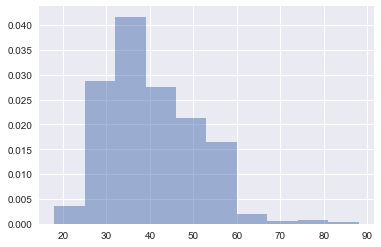

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,80,81,82,85,86,88,All
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,1,3,3,5,12,44,44,42,58,74,103,122,119,161,101,134,130,127,98,103,91,78,101,82,80,65,70,66,74,58,66,58,60,50,53,52,48,56,43,38,35,20,3,2,1,2,2,2,2,0,1,1,3,1,1,2,0,2,1,2,0,0,0,1,0,1,2860
1,1,0,0,3,2,2,4,4,8,10,9,12,19,25,18,19,8,7,11,10,13,14,2,14,6,4,8,6,3,8,10,3,11,8,5,5,10,5,3,6,9,7,4,3,2,0,2,0,1,1,1,1,0,1,0,1,0,2,2,1,1,3,1,1,0,2,0,362
All,3,1,3,6,7,14,48,48,50,68,83,115,141,144,179,120,142,137,138,108,116,105,80,115,88,84,73,76,69,82,68,69,69,68,55,58,62,53,59,49,47,42,24,6,4,1,4,2,3,3,1,2,1,4,1,2,2,2,4,2,3,3,1,1,1,2,1,3222


In [409]:
plt.hist(train['age'], normed=True, bins=10, alpha=0.5  , label='hist' )
plt.show()

#люди старше 60 лет значительно чаще соглашаются взять банковский продукт и количество резко падает
#выделим людей старше шестидесяти лет в 1 общую категорию = 61 год для отсечения длинного правого хвоста
pd.crosstab(train.y,train.age,margins=True).style.background_gradient(cmap='summer_r')

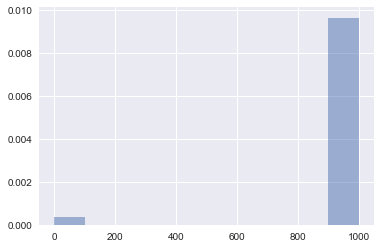

In [410]:
#фактор pdays значение = 999 означает отсутствие контакта выделим это как отдельный фактор
plt.hist(train['pdays'], normed=True, bins=10, alpha=0.5  , label='hist' )
plt.show()



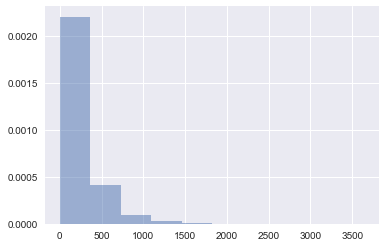

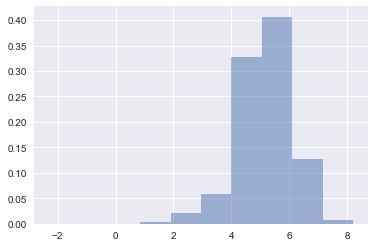

In [411]:
#duration имеет вид експоненциального распределения с длинным правым хвостом, логорифмируем данные показателя для приведения к виду нормального распределения
#будем мыслить в рамках цпт
plt.hist(train['duration'], normed=True, bins=10, alpha=0.5  , label='hist' )
plt.show()

plt.hist(np.log(train['duration']+0.1), normed=True, bins=10, alpha=0.5  , label='hist' )
plt.show()


### категориальные признаки

In [412]:
train[cat_feats].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent


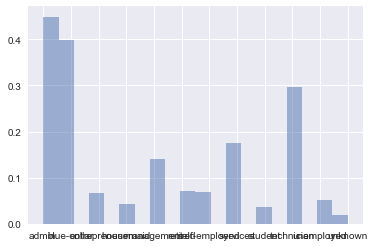

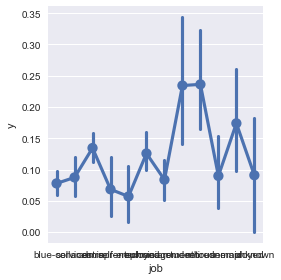

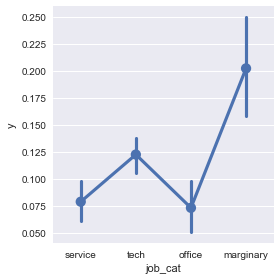

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
y,,,,,,,,,,,,,
0,689,652,109,71,230,97,116,282,49,459,76,30,2860
1,107,55,8,7,21,30,7,27,15,66,16,3,362
All,796,707,117,78,251,127,123,309,64,525,92,33,3222


In [413]:
plt.hist(train['job'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('job','y',data=train)
plt.show()

# в среднем с учетом дисперсии люди по разным профессиям одинакого плюс минус одинакого используют банковсим продуктом
#чуть активнее польззуются категории студентов, безработных, уволенных, что логично
train.groupby(['job'])[['job']].count().sort_values(['job'] , ascending = False)

#выделим типы категорий по общей логической сущности для избежания переобучения
train['job_cat'] =['tech' if job in ['admin.' , 'services','technician'] else 
                   ('service' if job in ['housemaid','blue-collar'] else 
                   ('office' if job in ['blue-collar' , 'entrepreneur' , 'management' , 'self-employed'] else
                    ('marginary'))) for job in train['job']]
#видно выделение маргинальных условий в большем желании использовать банковский продукт
sns.factorplot('job_cat','y',data=train)
plt.show()


pd.crosstab(train.y,train.job,margins=True).style.background_gradient(cmap='summer_r')

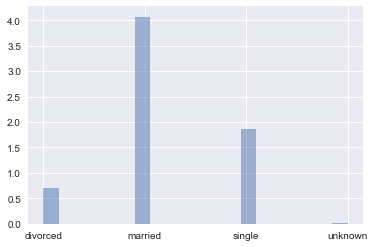

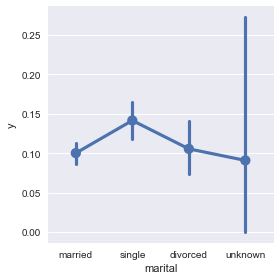

marital,divorced,married,single,unknown,All
y,,,,,
0,305,1769,776,10,2860
1,36,197,128,1,362
All,341,1966,904,11,3222


In [415]:
plt.hist(train['marital'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('marital','y',data=train)
plt.show()

#данный категориальный фактор будем использовать в чистом виде без преобразований, сильного эффекта от него мы не ожидаем, будем использовать ohe
pd.crosstab(train.y,train.marital,margins=True).style.background_gradient(cmap='summer_r')


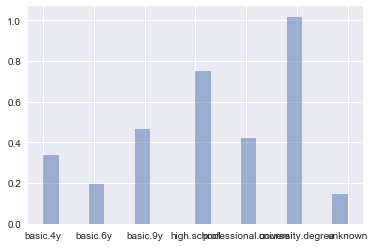

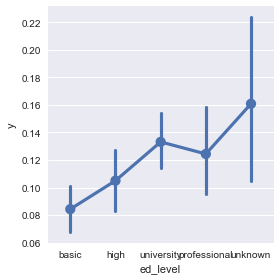

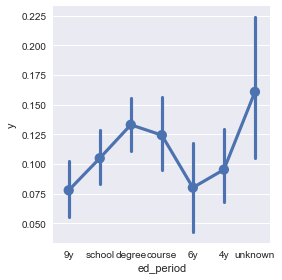

In [416]:
plt.hist(train['education'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

# в данном категориальном признаке зашито 2 признака, уровень образования и количество лет
#достаним эту информация через разделение по точке
import re

train['ed_level'] = [re.split('\.',ed)[0] for ed in train['education']]
train['ed_period'] = [ re.split('\.',ed)[1] if len(re.split('\.',ed)) > 1 else 'unknown' for ed in train['education']]

sns.factorplot('ed_level','y',data=train)
plt.show()

sns.factorplot('ed_period','y',data=train)
plt.show()

#теперь можно увидеть явную зависимость роста интереса к банковскому продукту при росте уровня образования, добавим данный фактор в модель

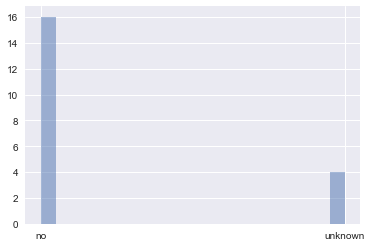

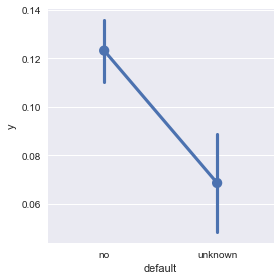

In [417]:
plt.hist(train['default'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('default','y',data=train)
plt.show()

#при отсутствии дефолта у клиентов вероятность воспользоваться банковским продуктом выше т,к. данный фактор состоит из 2 значений, можем заменить бинарным признаком
train['default'] = [1 if default == 'unknown' else 0 for default in train['default']]

In [418]:
plt.hist(train['housing'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('housing','y',data=train)
plt.show()
#видно, что матожидание и дисперсия группы 'unknown' и 'no' близки, доверительные интервалы пересекаются практически на 100%, можем объединить данные признаки и создать бинарный
train['housing'] = [1 if house == 'yes' else 0 for train['housing']]

SyntaxError: invalid syntax (<ipython-input-418-f379ea2a670b>, line 7)

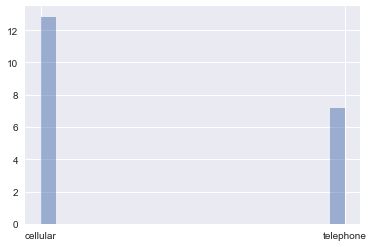

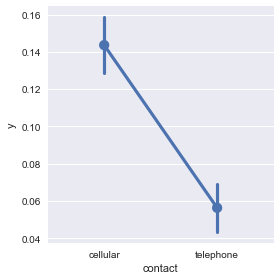

In [419]:
plt.hist(train['contact'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('contact','y',data=train)
plt.show()
#при контакте по телефону значительно меньшяя вероятность воспользоваться банковской услугой, выделим как отдельный фактор
train['contact_phone'] = [1 if con == 'telephone' else 0 for con in train['contact']]

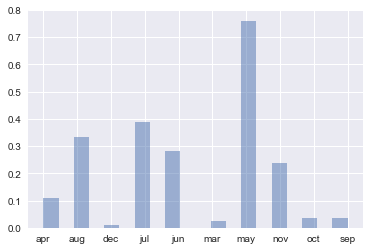

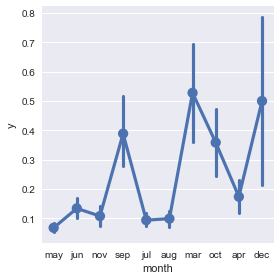

In [420]:
plt.hist(train['month'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('month','y',data=train)
plt.show()

#в летние месяца вероятность использовать банковский продукт значительно ниже, чем в прочие, все значения имеют свой весь, попробуем не обращать внимание на дисбаланс в связи с использованием бустинга над деревьями решений

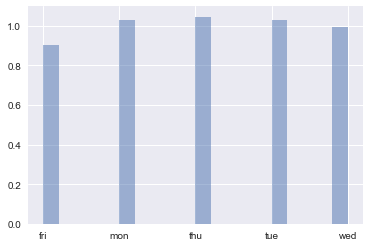

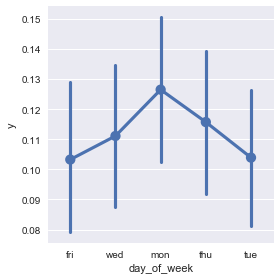

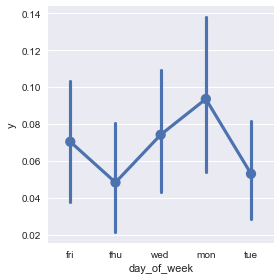

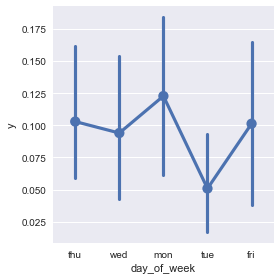

In [421]:
plt.hist(train['day_of_week'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('day_of_week','y',data=train)
plt.show()
#день нидели существенно не влияет, видна сильная дисперсия по всем дням. Очевидно, что влияет месяц, посмотрим в разрезе крупных месяцев
sns.factorplot('day_of_week','y',data=train[train['month'] == 'may'])
plt.show()
sns.factorplot('day_of_week','y',data=train[train['month'] == 'jul'])
plt.show()
#существенного эффекта не наблюдается


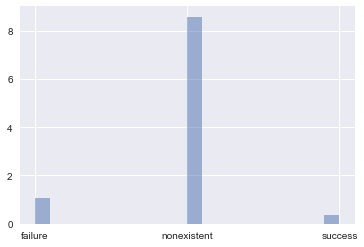

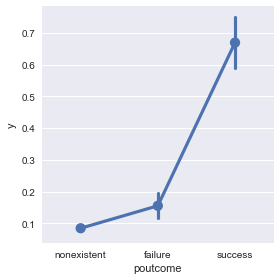

In [422]:
plt.hist(train['poutcome'], normed=True, bins=20, alpha=0.5  , label='hist' )
plt.show()

sns.factorplot('poutcome','y',data=train)
plt.show()

#результат предыдущей маркетинговой компании имеет сильное влияние, однако на маленькую часть выборки, однако используем данный фактор в модели

# препроцессинг

In [423]:
#количественные признаки

#в зависимости от количества сотрудников выделяется различие в вероятности использования банковскимпродуктом
train['employ_cat'] = round(np.log(train['nr.employed']+0.1),1)
#можно выделить 2 группы пользователей с индексом доверия > 3 и менее, среднего поведения нет, по-этому можно разделить прямым методом
train['euribor3m_cat'] = [1 if euribor > 3 else 0 for euribor in train['euribor3m']]
#ухудшение более чем на 1 квартального уровня занятости
train['emp.var.rate_decrease'] = [1 if rate < -1. else 0 for rate in train['emp.var.rate']]
#количество контактов до этой компании более 2 объединим в 1 класс
train['previous'] = [prev if prev <= 2 else 3 for prev in train['previous']]
#количество контактов во время этой компании больше 5
train['more_5_compaign'] = [1 if com > 5 else 0 for com in train['campaign']]
#людей старше 60 лет объединим и выделим фактор
train['age'] = [age if age <= 60 else 61 for age in train['age']]
train['age_more_60'] = [1 if age > 60 else 0 for age in train['age']]
#создаем фактор первого контакта
train['first_contact'] = [1 if x == 999 else 0 for x in train['pdays']]
#логорифмируем экспоненциальное распределение
train['duration'] = np.log(train['duration']+0.1)


#категориальные признаки
#выделим типы категорий по общей логической сущности для избежания переобучения
train['job_cat'] =['tech' if job in ['admin.' , 'services','technician'] else 
                   ('service' if job in ['housemaid','blue-collar'] else 
                   ('office' if job in ['blue-collar' , 'entrepreneur' , 'management' , 'self-employed'] else
                    ('marginary'))) for job in train['job']]
train['marital'] = train['marital'] #чтобы не забыть ohe

#выделим уровень образования клиентов 
train['ed_level'] = [re.split('\.',ed)[0] for ed in train['education']]
train['ed_period'] = [ re.split('\.',ed)[1] if len(re.split('\.',ed)) > 1 else 'unknown' for ed in train['education']]
#при отсутствии дефолта у клиентов вероятность воспользоваться банковским продуктом выше т,к. данный фактор состоит из 2 значений, можем заменить бинарным признаком
train['default'] = [1 if default == 'unknown' else 0 for default in train['default']]
#видно, что матожидание и дисперсия группы 'unknown' и 'no' близки, доверительные интервалы пересекаются практически на 100%, можем объединить данные признаки и создать бинарный
train['housing'] = [1 if house == 'yes' else 0 for house in  train['housing']]
#при контакте по телефону значительно меньшяя вероятность воспользоваться банковской услугой, выделим как отдельный фактор
train['contact_phone'] = [1 if con == 'telephone' else 0 for con in train['contact']]
#все месяца имеют свой вес
train['month'] #ohe
train['poutcome'] #ohe

ohe_cols = ['poutcome' , 'month' , 'marital' , 'job_cat','ed_level' , 'ed_period']
use_cols = ['employ_cat' , 'euribor3m_cat' ,'emp.var.rate_decrease' , 'previous'
           ,'more_5_compaign' , 'age' , 'age_more_60' ,'first_contact' , 'duration'
           ,'default' , 'housing' , 'contact_phone']



In [424]:
use_cols.extend(ohe_cols)
use_cols.append('y')
train = train[use_cols][:]


In [425]:
train.shape

(3222, 19)

In [426]:
train.head()

,employ_cat,euribor3m_cat,emp.var.rate_decrease,previous,more_5_compaign,age,age_more_60,first_contact,duration,default,housing,contact_phone,poutcome,month,marital,job_cat,ed_level,ed_period,y
0,8.5,0,1,0,0,30,0,1,6.188469,0,1,0,nonexistent,may,married,service,basic,9y,0
1,8.6,1,0,0,0,39,0,1,5.846728,0,0,1,nonexistent,may,single,tech,high,school,0
2,8.6,1,0,0,0,25,0,1,5.425390,0,1,1,nonexistent,jun,married,tech,high,school,0
3,8.6,1,0,0,0,38,0,1,2.839078,0,0,1,nonexistent,jun,married,tech,basic,9y,0
4,8.6,1,0,0,0,47,0,1,4.062166,0,1,0,nonexistent,nov,married,tech,university,degree,0


In [427]:
train = pd.get_dummies(train, columns=ohe_cols)[:]


model_columns = train.drop(['y','marital_unknown'] , axis = 1).columns
train.shape



(3222, 46)

# model

In [428]:
from sklearn.model_selection import RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5, random_state=201805)

In [431]:
lgb_data_train = lgb.Dataset(train[model_columns], 
                             train['y'], 
                             free_raw_data=False
                            )

params = {
    'objective':'binary', 
    'metric': 'auc',
    'learning_rate': 0.01, 
    'random_state':4242442,
    'subsample':0.33,
    'class_weight':'is_unbalance',
    'colsample_bytree':0.33,
    'reg_lambda':4
}



h = lgb.cv(params, 
           lgb_data_train, 
           num_boost_round=10000,
           early_stopping_rounds=50, 
           verbose_eval=10, 
           folds=skf.split(train[model_columns], train['y'])
          )

#смотрим на результаты кросс валидации при повторяющихся фолдах, т.к. выборка маленькая
#разбиваем на 4 фолда с 5 повторениями
#выбор пал на модель бустинга над деревьями решений, т.к. хорошо себя показал в подобных задачах бинарной классификации при несбалансированных выборках
#дополнительно при обучении и кросс валидации указываем гиперпараметры
# задача - бинарной классификации
#метрица auc -  стандартная метрика оценки качества бинарной классификации, учитывающая дисбаланс классов
#дополнительно при обучении укажем, что веса классов несбалансированны для снижения штрафа модели в попытках усреднить FP и FN показатели
#оптимальный  шаг  = 660

[10]	cv_agg's auc: 0.859221 + 0.0176412
[20]	cv_agg's auc: 0.893993 + 0.0155428
[30]	cv_agg's auc: 0.901018 + 0.0128548
[40]	cv_agg's auc: 0.896362 + 0.0139762
[50]	cv_agg's auc: 0.90303 + 0.0131681
[60]	cv_agg's auc: 0.908561 + 0.0128269
[70]	cv_agg's auc: 0.911898 + 0.0124326
[80]	cv_agg's auc: 0.909577 + 0.0123325
[90]	cv_agg's auc: 0.91053 + 0.0120797
[100]	cv_agg's auc: 0.913275 + 0.0117615
[110]	cv_agg's auc: 0.914253 + 0.0115624
[120]	cv_agg's auc: 0.914102 + 0.0117475
[130]	cv_agg's auc: 0.914068 + 0.0117661
[140]	cv_agg's auc: 0.917675 + 0.012226
[150]	cv_agg's auc: 0.91807 + 0.0121961
[160]	cv_agg's auc: 0.919659 + 0.0122906
[170]	cv_agg's auc: 0.919496 + 0.0121917
[180]	cv_agg's auc: 0.919594 + 0.0122072
[190]	cv_agg's auc: 0.921257 + 0.0123253
[200]	cv_agg's auc: 0.92123 + 0.0120955
[210]	cv_agg's auc: 0.921409 + 0.0119632
[220]	cv_agg's auc: 0.92145 + 0.0118753
[230]	cv_agg's auc: 0.92175 + 0.0118095
[240]	cv_agg's auc: 0.92221 + 0.0117244
[250]	cv_agg's auc: 0.921979 + 0.

In [432]:
model = lgb.train(params, lgb_data_train, num_boost_round=660  )

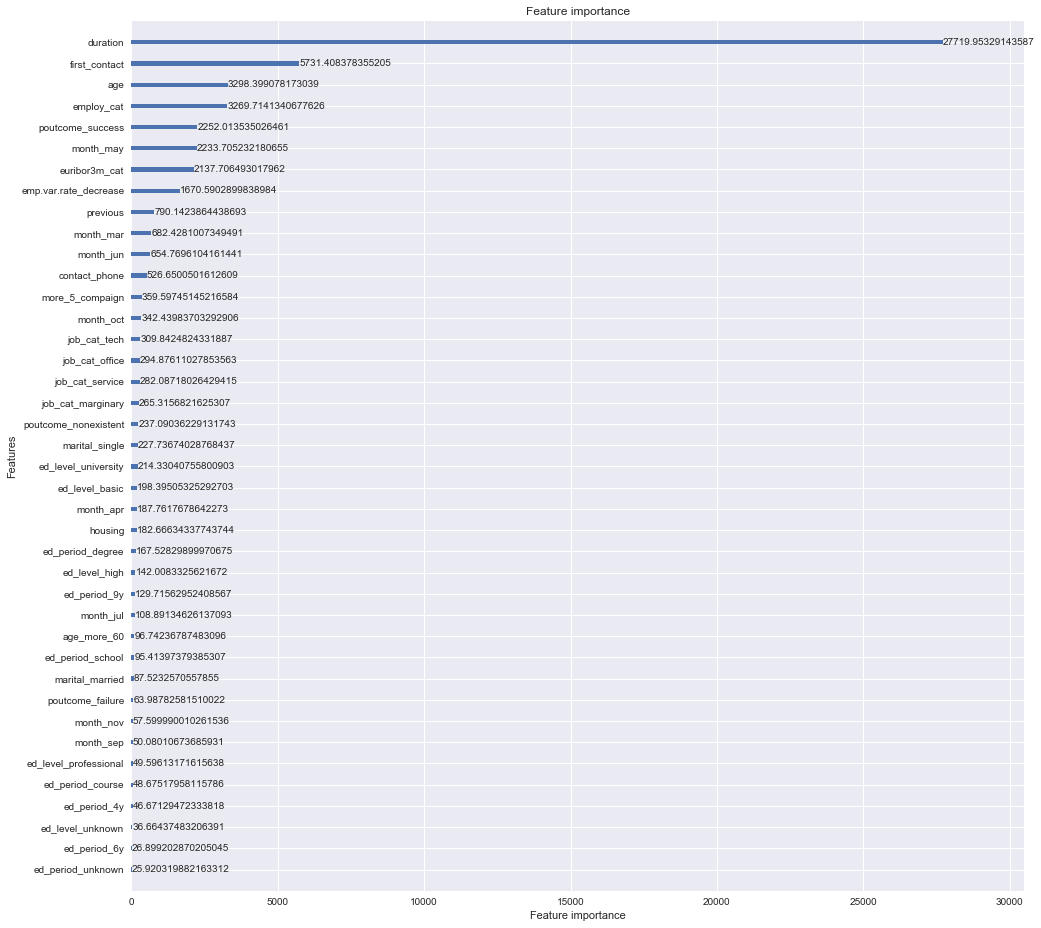

In [433]:
#отразим важные факторы
lgb.plot_importance(model, figsize=(16,16), importance_type='gain', max_num_features=40)

In [434]:
x_train, x_test, y_train, y_test  = train_test_split(train[model_columns], train['y'],
                                                    stratify=train['y'], 
                                                    test_size=0.30)

In [435]:
lgb_data_train = lgb.Dataset(x_train, 
                             y_train, 
                             free_raw_data=False
                            )

model = lgb.train(params, lgb_data_train, num_boost_round=750  )

print(metrics.roc_auc_score(y_test, model.predict(x_test)))

0.9289044289044288


In [436]:
r = 0
for pred , test in zip (model.predict(x_test) , y_test):
    if r < 10:
        print (round(pred,0) , test)
    
    r += 1

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 1


0.9048603929679421


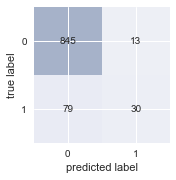

In [437]:
#посмотрим на confusion matrix чтобы удостовериться в качестве модели

##result
y_pred = [1 if p > 0.5 else 0 for p in np.array(model.predict(x_test))]


from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred)


print(1 - (cm[1][0]+ cm[0][1])/sum(cm))
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [440]:
#for test
test = pd.read_csv(test_directory, header=0 )

#количественные признаки

#в зависимости от количества сотрудников выделяется различие в вероятности использования банковскимпродуктом
test['employ_cat'] = round(np.log(test['nr.employed']+0.1),1)
#можно выделить 2 группы пользователей с индексом доверия > 3 и менее, среднего поведения нет, по-этому можно разделить прямым методом
test['euribor3m_cat'] = [1 if euribor > 3 else 0 for euribor in test['euribor3m']]
#ухудшение более чем на 1 квартального уровня занятости
test['emp.var.rate_decrease'] = [1 if rate < -1. else 0 for rate in test['emp.var.rate']]
#количество контактов до этой компании более 2 объединим в 1 класс
test['previous'] = [prev if prev <= 2 else 3 for prev in test['previous']]
#количество контактов во время этой компании больше 5
test['more_5_compaign'] = [1 if com > 5 else 0 for com in test['campaign']]
#людей старше 60 лет объединим и выделим фактор
test['age'] = [age if age <= 60 else 61 for age in test['age']]
test['age_more_60'] = [1 if age > 60 else 0 for age in test['age']]
#создаем фактор первого контакта
test['first_contact'] = [1 if x == 999 else 0 for x in test['pdays']]
#логорифмируем экспоненциальное распределение
test['duration'] = np.log(test['duration']+0.1)


#категориальные признаки
#выделим типы категорий по общей логической сущности для избежания переобучения
test['job_cat'] =['tech' if job in ['admin.' , 'services','technician'] else 
                   ('service' if job in ['housemaid','blue-collar'] else 
                   ('office' if job in ['blue-collar' , 'entrepreneur' , 'management' , 'self-employed'] else
                    ('marginary'))) for job in test['job']]
test['marital'] = test['marital'] #чтобы не забыть ohe

#выделим уровень образования клиентов 
test['ed_level'] = [re.split('\.',ed)[0] for ed in test['education']]
test['ed_period'] = [ re.split('\.',ed)[1] if len(re.split('\.',ed)) > 1 else 'unknown' for ed in test['education']]
#при отсутствии дефолта у клиентов вероятность воспользоваться банковским продуктом выше т,к. данный фактор состоит из 2 значений, можем заменить бинарным признаком
test['default'] = [1 if default == 'unknown' else 0 for default in test['default']]
#видно, что матожидание и дисперсия группы 'unknown' и 'no' близки, доверительные интервалы пересекаются практически на 100%, можем объединить данные признаки и создать бинарный
test['housing'] = [1 if house == 'yes' else 0 for house in  test['housing']]
#при контакте по телефону значительно меньшяя вероятность воспользоваться банковской услугой, выделим как отдельный фактор
test['contact_phone'] = [1 if con == 'telephone' else 0 for con in test['contact']]
#все месяца имеют свой вес
test['month'] #ohe
test['poutcome'] #ohe

ohe_cols = ['poutcome' , 'month' , 'marital' , 'job_cat','ed_level' , 'ed_period']
use_cols = ['employ_cat' , 'euribor3m_cat' ,'emp.var.rate_decrease' , 'previous'
           ,'more_5_compaign' , 'age' , 'age_more_60' ,'first_contact' , 'duration'
           ,'default' , 'housing' , 'contact_phone']

use_cols.extend(ohe_cols)

test = test[use_cols][:]

test = pd.get_dummies(test, columns=ohe_cols)[:]


model.predict(test[model_columns])

y_pred = [1 if p > 0.5 else 0 for p in np.array(model.predict(test[model_columns]))]

sub = pd.DataFrame({
    '_ID_':list(test.index),
    '_VAL_': y_pred
})
sub.to_csv('test_pred.csv',index=False)
sub.head()

,_ID_,_VAL_
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# вывод
1. на кроссвалидации качество модели показывает оценку 91,7% площадь под рок кривой, что свидетельствует о хорошем качестве модели
2. для оптимизации работы модели можно использовать показатель качества f1 score или gini, т.к. они более чувствительны к несбалансированным выборкам
3. низкий объем данных не позволяет достоверно оценить качество модели, необходимо расширить выборку для проведения широкого тестирования и более тонкой настройки модели
4. в применимости задачи бизнеса можно управлять уровнем отсечения доверия к модели и управлять долей FN и FP решая, что для данной задачи и аналитика важнее - предсказать больше удачного исхода или негативного

# todo
1. ансамбль классификаторов
2. использование стандартных мат. операций над количественными факторами - мо, сто, мед, мин, макс
3. использование информации о стандартных мат. операциях над метками по тренировочной выборке
4. точечная настройка гиперпараметров через hyperopt или randomizedgridsearch
5. визуализация качества модели через рок кривую